In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
data = requests.get(url).json()
clients = pd.DataFrame(data)

In [3]:
clients_flat = pd.concat([
    clients[['customerID', 'Churn']],
    pd.json_normalize(clients['customer']),
    pd.json_normalize(clients['phone']),
    pd.json_normalize(clients['internet']),
    pd.json_normalize(clients['account'])
], axis=1)

In [4]:
dataclean = clients_flat.drop_duplicates()
dataclean = dataclean.replace([''], pd.NA)
dataclean = dataclean.dropna(subset=['customerID', 'Churn']).reset_index(drop=True)

In [5]:
dataclean = dataclean.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'PhoneService': 'Servico_Celular',
    'MultipleLines': 'Linhas_Adicionais',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Filmes_Streaming',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Faturamento_Sem_Papel',
    'PaymentMethod': 'Metodo_de_Pagamento',
    'Charges.Monthly': 'Faturamento_Mensal',
    'Charges.Total': 'Faturamento_Total'
})

In [6]:
dataclean['Churn'] = dataclean['Churn'].map({'Yes': 'Sim', 'No': 'Não'})
dataclean['Genero'] = dataclean['Genero'].map({'Female': 'Feminino', 'Male': 'Masculino'})
dataclean['Idoso'] = dataclean['Idoso'].map({0: 'Não', 1: 'Sim'})

In [7]:
dataclean['Contrato'] = dataclean['Contrato'].replace({
    'Month-to-month': 'Mensal',
    'One year': '1 Ano',
    'Two year': '2 Anos'
})

dataclean['Metodo_de_Pagamento'] = dataclean['Metodo_de_Pagamento'].replace({
    'Bank transfer (automatic)': 'Transferência Bancária (Automática)',
    'Credit card (automatic)': 'Cartão de Crédito (Automático)',
    'Electronic check': 'Cheque Eletrônico',
    'Mailed check': 'Cheque Enviado'
})


In [8]:
dataclean = dataclean.rename(columns={'tenure': 'Meses_Cliente'})

In [9]:
yes_no_cols = ['Parceiro', 'Dependentes', 'Servico_Celular', 'Linhas_Adicionais',
               'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
               'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming', 'Faturamento_Sem_Papel']

In [10]:
for col in yes_no_cols:
    dataclean[col] = dataclean[col].replace({
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem serviço de internet',
        'No phone service': 'Sem serviço de telefone'
    })

In [11]:
dataclean['Servico_Internet'] = dataclean['Servico_Internet'].replace({
    'Fiber optic': 'Fibra Óptica',
    'DSL': 'DSL',
    'No': 'Não'
})

In [12]:
dataclean['Contas_Diarias'] = dataclean['Faturamento_Mensal'] / 30

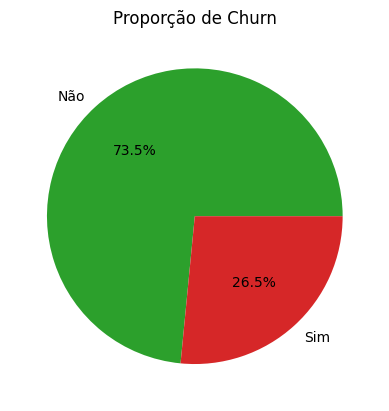

In [13]:
churn_contagem = dataclean['Churn'].value_counts()
churn_contagem.plot(
    kind='pie',
    labels=['Não', 'Sim'],
    autopct='%1.1f%%',
    colors=['#2ca02c', '#d62728'],
    title='Proporção de Churn'
)
plt.ylabel('')
plt.show()

In [14]:
categoricas = ['Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Servico_Celular',
               'Servico_Internet', 'Contrato', 'Metodo_de_Pagamento']

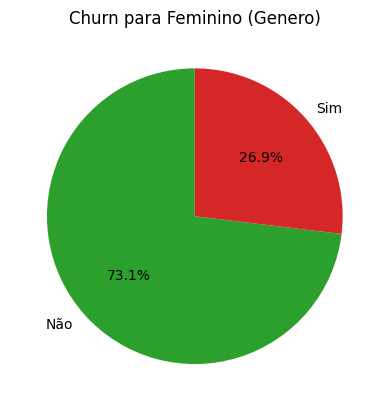

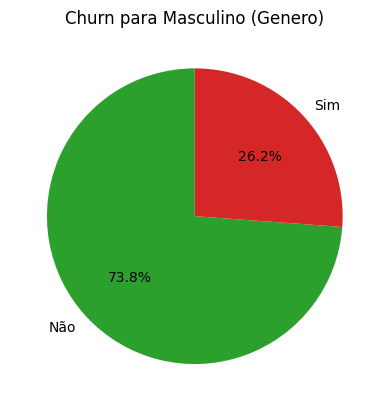

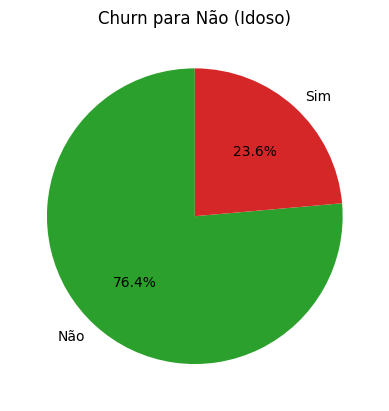

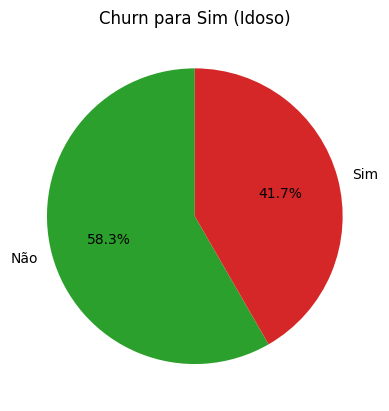

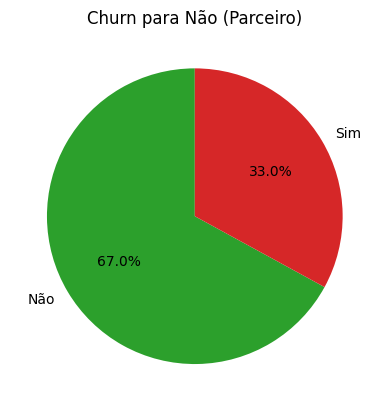

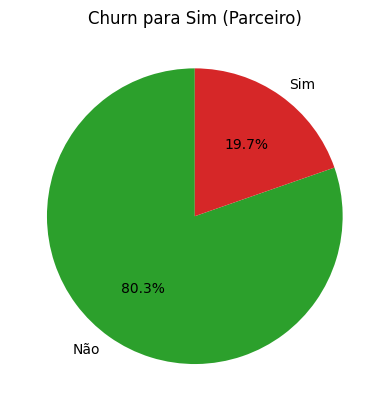

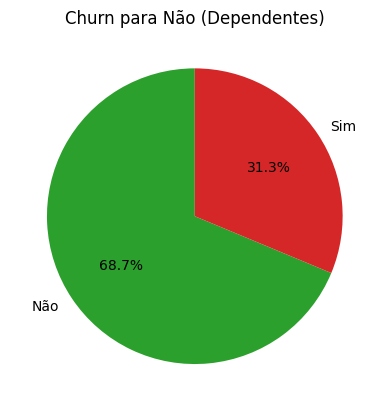

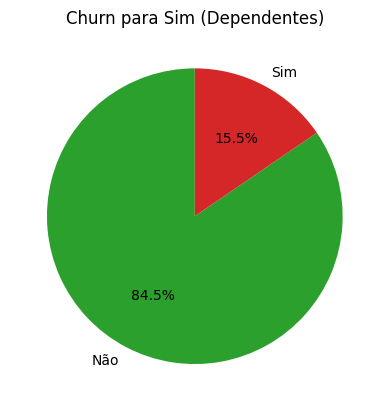

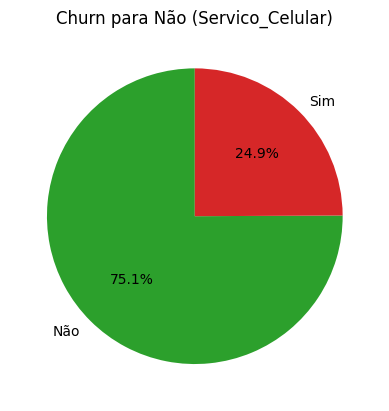

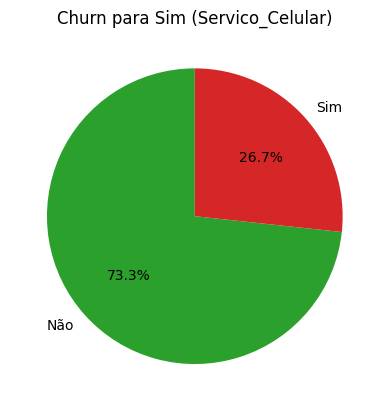

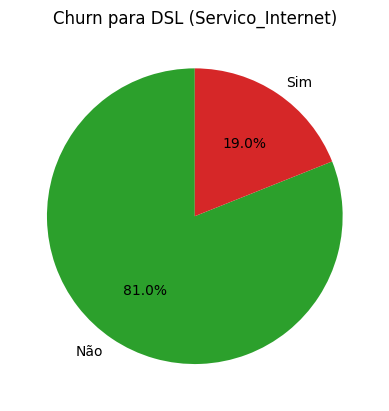

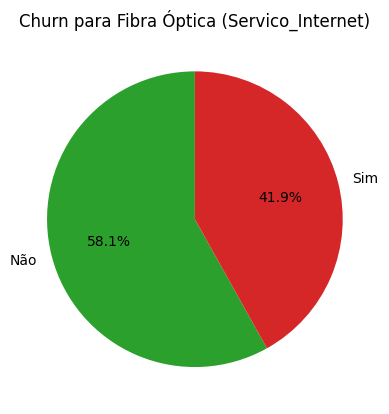

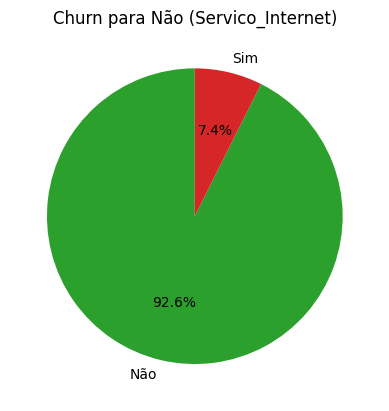

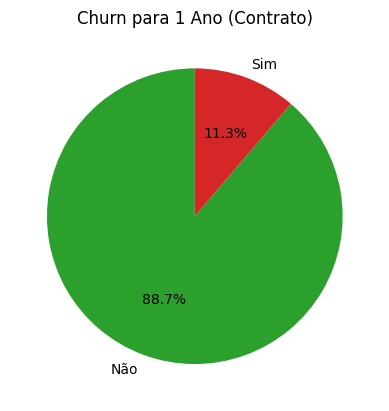

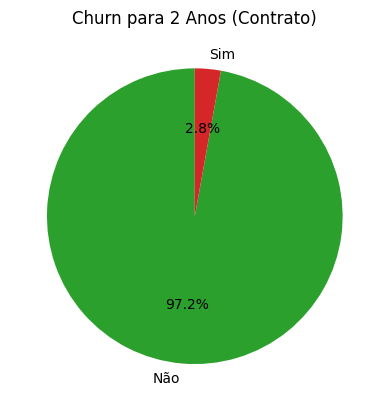

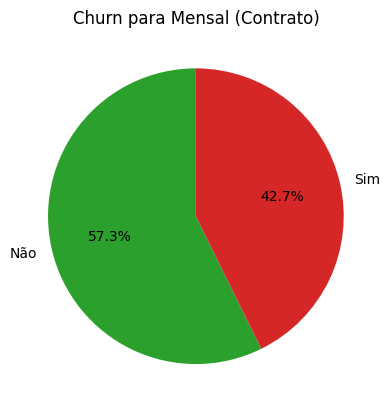

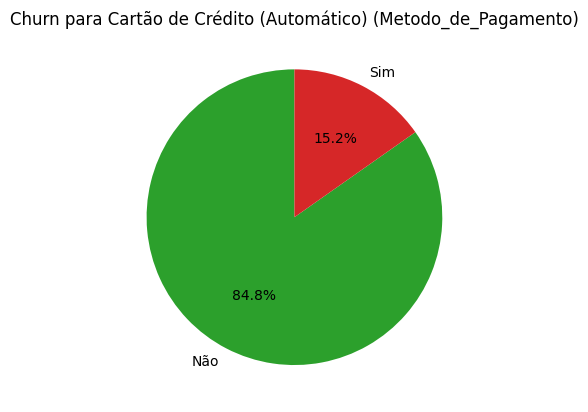

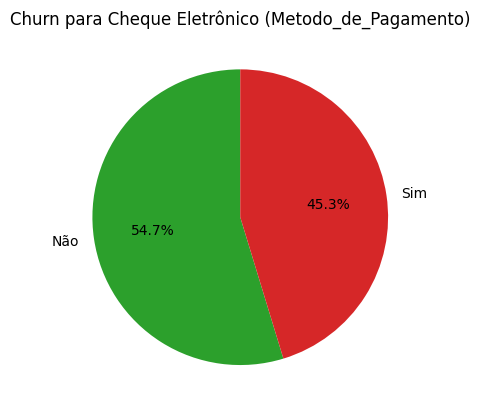

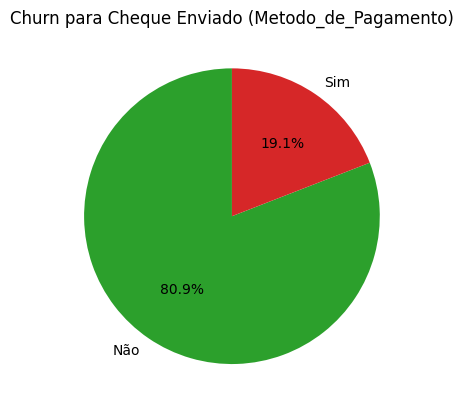

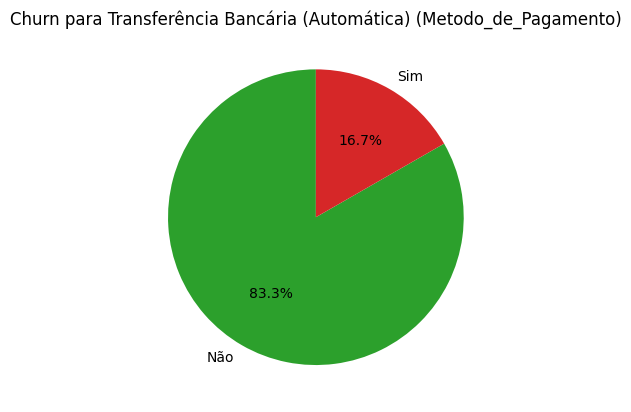

In [15]:
for col in categoricas:
    churn_categ = pd.crosstab(dataclean[col], dataclean['Churn'])
    for categoria in churn_categ.index:
        churn_categ.loc[categoria].plot(
            kind='pie',
            autopct='%1.1f%%',
            startangle=90,
            colors=['#2ca02c', '#d62728'],
            title=f'Churn para {categoria} ({col})'
        )
        plt.ylabel('')
        plt.show()

In [16]:
numericas = ['Meses_Cliente', 'Faturamento_Mensal', 'Faturamento_Total', 'Contas_Diarias']

In [18]:
estatisticas_por_churn = dataclean.groupby('Churn')[numericas].describe().T
print(estatisticas_por_churn)

Churn                             Não          Sim
Meses_Cliente      count  5174.000000  1869.000000
                   mean     37.569965    17.979133
                   std      24.113777    19.531123
                   min       0.000000     1.000000
                   25%      15.000000     2.000000
                   50%      38.000000    10.000000
                   75%      61.000000    29.000000
                   max      72.000000    72.000000
Faturamento_Mensal count  5174.000000  1869.000000
                   mean     61.265124    74.441332
                   std      31.092648    24.666053
                   min      18.250000    18.850000
                   25%      25.100000    56.150000
                   50%      64.425000    79.650000
                   75%      88.400000    94.200000
                   max     118.750000   118.350000
Contas_Diarias     count  5174.000000  1869.000000
                   mean      2.042171     2.481378
                   std       1.

C:\Users\andressa\AppData\Local\Temp\ipykernel_17036\3558448237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dataclean, palette=['#2ca02c','#d62728'])


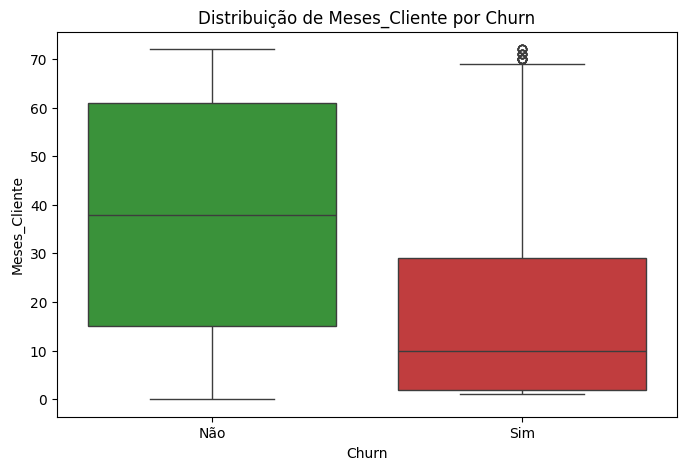

C:\Users\andressa\AppData\Local\Temp\ipykernel_17036\3558448237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dataclean, palette=['#2ca02c','#d62728'])


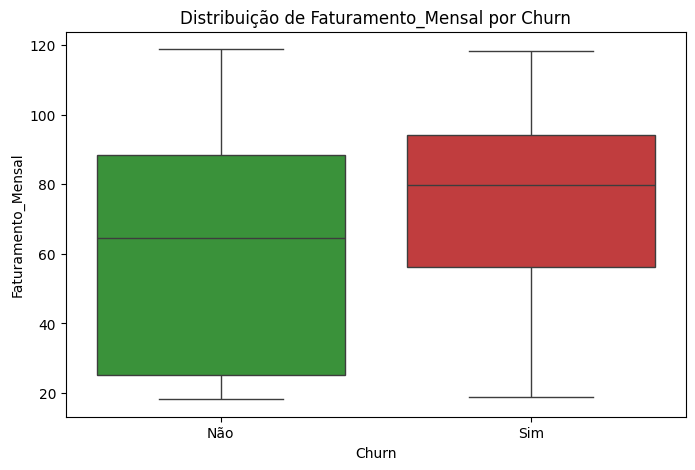

C:\Users\andressa\AppData\Local\Temp\ipykernel_17036\3558448237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dataclean, palette=['#2ca02c','#d62728'])


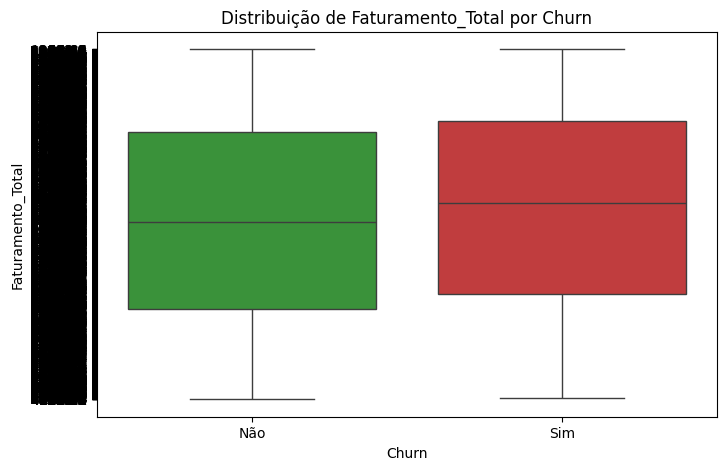

C:\Users\andressa\AppData\Local\Temp\ipykernel_17036\3558448237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dataclean, palette=['#2ca02c','#d62728'])


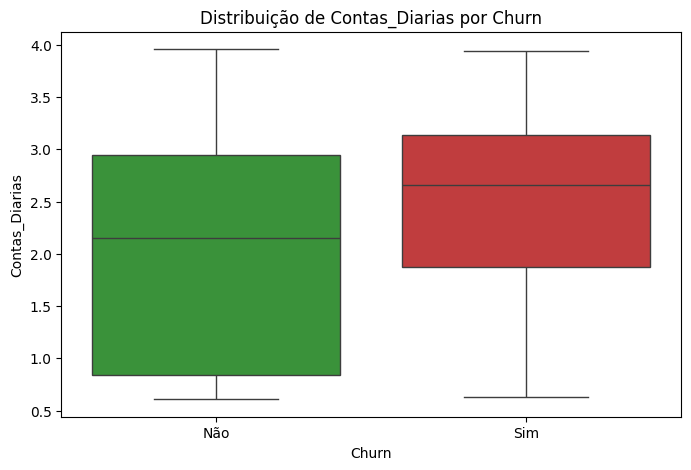

In [19]:
for col in numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=col, data=dataclean, palette=['#2ca02c','#d62728'])
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()

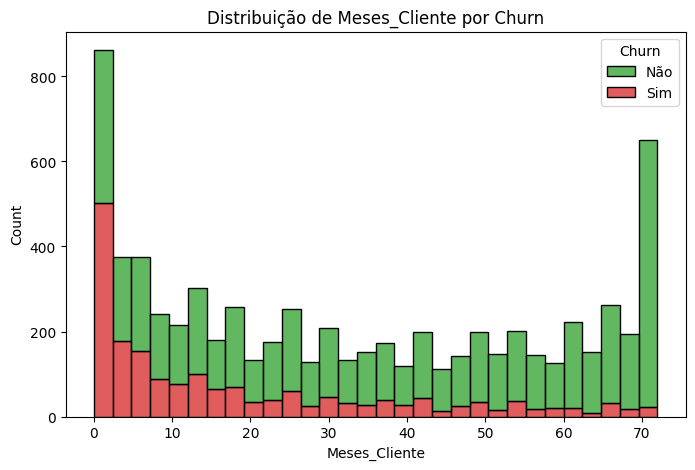

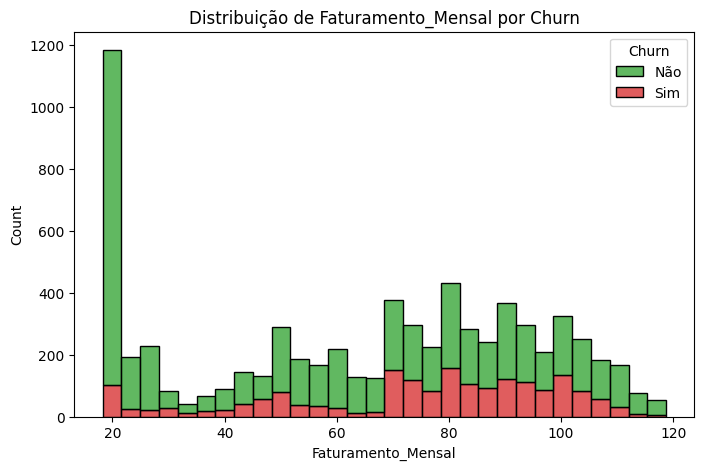

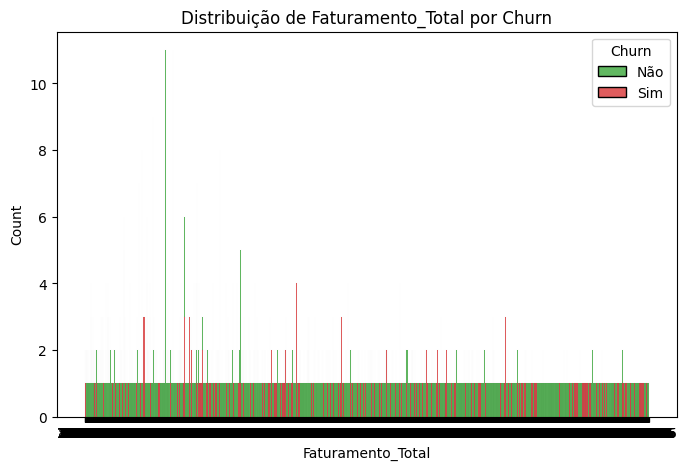

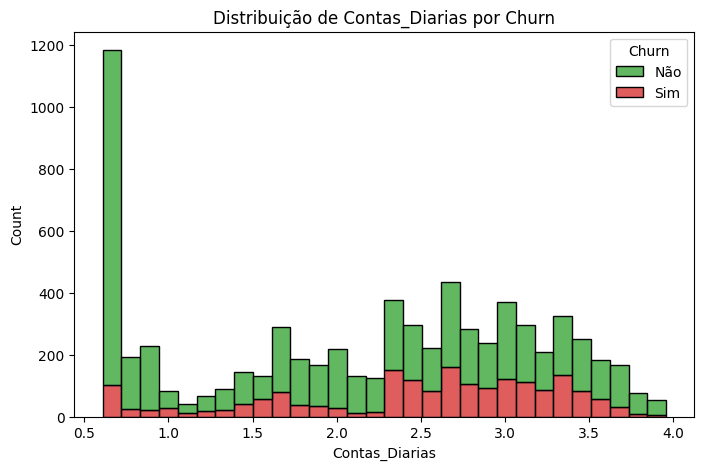

In [20]:
for col in numericas:
    plt.figure(figsize=(8,5))
    sns.histplot(data=dataclean, x=col, hue='Churn', multiple='stack', 
                 palette=['#2ca02c','#d62728'], bins=30)
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()

# Relatório de Análise de Churn - TelecomX

## 1. Introdução
O objetivo deste relatório é analisar o comportamento dos clientes da TelecomX, com foco na **evasão de clientes (Churn)**.  
Churn representa os clientes que cancelaram seus serviços, um problema crítico para empresas de telecomunicações, pois impacta diretamente a receita e a sustentabilidade do negócio. A análise visa identificar padrões, perfis e variáveis que influenciam a evasão, fornecendo insights para estratégias de retenção.

---

## 2. Limpeza e Tratamento de Dados
O conjunto de dados original foi obtido em formato JSON, contendo informações sobre clientes, serviços contratados e faturamento. Para garantir uma análise confiável, foram realizados os seguintes passos:

1. **Importação e normalização**: Expansão das colunas aninhadas relacionadas a dados do cliente, telefone, internet e conta.  
2. **Remoção de duplicatas e valores ausentes**: Exclusão de registros duplicados e de clientes com informações críticas ausentes, como `customerID` e `Churn`.  
3. **Renomeação de colunas**: As colunas foram traduzidas e renomeadas para facilitar a compreensão, por exemplo, `PhoneService` virou `Servico_Celular`.  
4. **Conversão de valores binários**: Campos com valores `Yes/No` ou `0/1` foram convertidos para `Sim/Não`.  
5. **Tradução de categorias restantes**: Contratos e métodos de pagamento foram traduzidos para português.  
6. **Criação de novas variáveis**: Foi criada a coluna `Contas_Diarias` para avaliar o gasto diário médio do cliente.

---

## 3. Análise Exploratória de Dados
### 3.1 Proporção de Churn
A análise inicial mostrou a proporção geral de clientes que cancelaram e os que permaneceram ativos. O gráfico de pizza indicou claramente que uma parcela significativa dos clientes permanece, mas existe um grupo considerável que cancela os serviços.

### 3.2 Churn por Categoria
Foram analisadas variáveis categóricas como gênero, idade (Idoso), estado civil (Parceiro), presença de dependentes, serviços contratados e tipo de contrato.  
Principais observações:
- Clientes mais velhos e com parceiros tendem a ter menor churn.
- Clientes com contratos mensais apresentam maior risco de cancelamento.
- Serviços adicionais, como segurança online, TV ou filmes em streaming, parecem reduzir a probabilidade de churn.

### 3.3 Variáveis Numéricas
Analisaram-se também variáveis numéricas, como:
- **Meses de cliente**: clientes que permanecem mais tempo apresentam menor risco de churn.
- **Faturamento mensal e total**: altos gastos não garantem retenção; há clientes com faturas altas que ainda cancelam.
- **Contas diárias**: o gasto médio diário segue padrão semelhante, reforçando que apenas o valor não é suficiente para prever churn.

Boxplots e estatísticas descritivas evidenciaram diferenças claras nas distribuições de variáveis numéricas entre clientes que cancelaram e os que permaneceram.

---

## 4. Conclusões e Insights
- O tempo de permanência é um forte indicador de retenção: clientes antigos cancelam menos.  
- Alguns perfis demográficos, como idosos ou clientes com parceiros, apresentam menor probabilidade de evasão.  
- Contratos de longo prazo e serviços adicionais estão associados a menor churn.  
- Clientes com contratos mensais ou sem serviços extras estão em maior risco.  

Esses insights ajudam a empresa a identificar clientes com maior probabilidade de cancelamento e a direcionar ações preventivas.

---

## 5. Recomendações
1. **Incentivar contratos de longo prazo**: Oferecer benefícios para clientes que assinem planos de 1 ou 2 anos.  
2. **Ações de retenção para contratos mensais**: Identificar clientes com maior risco e criar campanhas de fidelização.  
3. **Promoção de serviços adicionais**: Incentivar segurança online, backup, TV e filmes em streaming para aumentar engajamento.  
4. **Campanhas direcionadas a clientes novos**: Clientes com menor tempo de permanência devem ser acompanhados de perto.  
5. **Monitoramento contínuo**: Atualizar regularmente as análises de churn para ajustar estratégias com base em novos dados.

---

**Resumo:**  
O trabalho realizado permitiu compreender padrões de churn na base de clientes da TelecomX, destacando fatores de risco e oportunidades de retenção. As visualizações e estatísticas fornecem suporte para decisões estratégicas que podem reduzir a evasão de clientes.